# Cardiovascular Disease Prediction using Neural Networks 

![Heart Disease Presiction](https://th.bing.com/th/id/R.d7c6e9b8303cffbb7fb1542d5d09c07e?rik=WUokaPXPdujXwA&pid=ImgRaw&r=0)

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### 1. Importing the Dataset

The dataset is available through the University of California, Irvine Machine learning repository. Here is the <a href= http:////archive.ics.uci.edu/ml/datasets/Heart+Disease>URL</a> :

Also I uploaded it on <a herf = https://www.kaggle.com/datasets/ayanabil11/cardiovascular-disease-dataset/code?datasetId=3531673&sortBy=dateRun&tab=profile>Kaggle</a>:


* we will do the same. More specifically, we will use the data collected at the Cleveland Clinic Foundation.

In [3]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# read the csv
cleveland = pd.read_csv(url, names=names)

In [4]:
# print the shape of the DataFrame, so we can see how many examples we have
print ('format(cleveland.shape')
print (cleveland.loc[1])

format(cleveland.shape
age          67.0
sex           1.0
cp            4.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       2.0
thalach     108.0
exang         1.0
oldpeak       1.5
slope         2.0
ca            3.0
thal          3.0
class           2
Name: 1, dtype: object


In [5]:
# print the last twenty data points
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [6]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [7]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [8]:
# print the shape and data type of the dataframe
print (data.shape)
print (data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [9]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [10]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


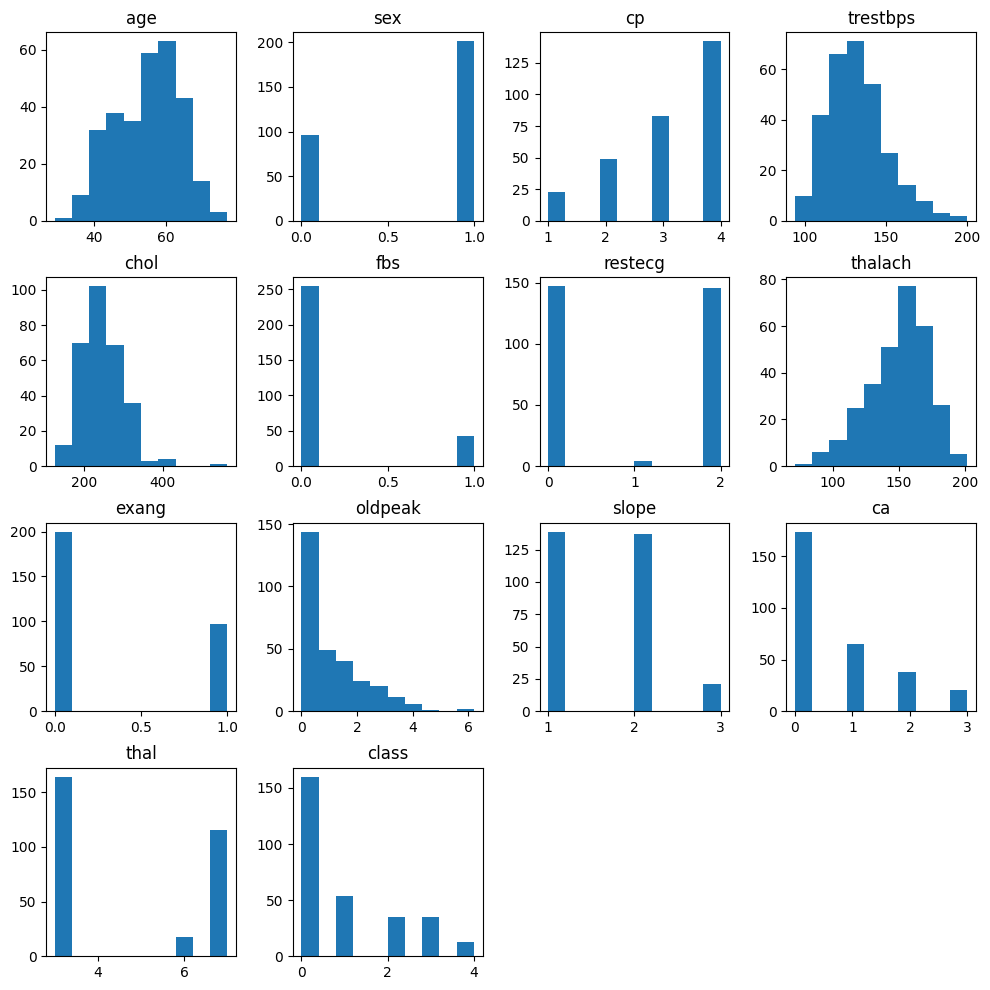

In [11]:
# plot histograms for each variable
data.hist(figsize = (12, 12), grid = False)
plt.show()

### 2. Create Training and Testing Datasets

* Now we can split it into training and testings datasets. 
* We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data). 

*Furthermore, the class values in this dataset contain multiple types of heart disease with values ranging from 0 (healthy) to 4 (severe heart disease). Consequently, we will need to convert our class data to categorical labels. For example, the label 2 will become [0, 0, 1, 0, 0].*

In [12]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['class'], axis = 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [13]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(237, 5)
[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


### 3. Building and Training the Neural Network

Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. 
Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 5)                 25        
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Admin123\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.5074 - accuracy: 0.5485
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.4453 - accuracy: 0.5485
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.4166 - accuracy: 0.5485
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3692 - accuracy: 0.5485
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3343 - accuracy: 0.5485
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3018 - accuracy: 0.5485
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2816 - accuracy: 0.5485
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2570 - accuracy: 0.5485
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2442 - accuracy: 0.5485
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2250 - accuracy: 0.5485
Epoch 11/

### 4. Improving Results - A Binary Classification Problem

Although we achieved promising results, we still have a fairly large error. This could be because it is very difficult to distinguish between the different severity levels of heart disease (classes 1 - 4). Let's simplify the problem by converting the data to a binary classification problem - heart disease or no heart disease.

In [16]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

[1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1]


In [17]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 112       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.4810
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5612
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.6793
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5865
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6414
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.6203
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.6456
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6540
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6624
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6076
Epoch 11/

### 5. Results and Metrics

The accuracy results we have been seeing are for the training data, but what about the testing dataset? If our model's cannot generalize to data that wasn't used to train them, they won't provide any utility. 

Now we will test the performance of both our categorical model and binary model.  
* To do this, we will make predictions on the training dataset and calculate performance metrics using Sklearn.

In [19]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 [==============================] - 0s 4ms/step
Results for Categorical Model
0.6
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.20      0.10      0.13        10
           2       0.50      0.10      0.17        10
           3       0.35      0.88      0.50         8
           4       0.00      0.00      0.00         2

    accuracy                           0.60        60
   macro avg       0.37      0.40      0.33        60
weighted avg       0.57      0.60      0.55        60



C:\Users\Admin123\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin123\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin123\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 [==============================] - 0s 2ms/step
Results for Binary Model
0.9
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.88      0.93      0.90        30

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

